# Simon Mokhanda (Forecasting S\&P500 Futures)

### 1) Install Necessary packages

pip install pystan

In [2]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
anceled
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pystan==2.19.1.1

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


### 2) Import Data

In [1]:
import pandas as pd
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [2]:
pwd()

'/home/simon/Downloads'

In [3]:
f = pd.read_excel('S&P500Futures.xlsx')
f.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2055.00,2067.25,2038.75,2046.25,2046.25,1358348
1,2015-01-05,2045.75,2048.25,2009.50,2016.00,2016.00,2033774
2,2015-01-06,2019.00,2023.50,1984.25,1994.50,1994.50,2345361
3,2015-01-07,1996.50,2023.75,1995.75,2019.50,2019.50,1760658
4,2015-01-08,2020.50,2058.50,2020.25,2055.00,2055.00,1555733


In [4]:
f1 = f.drop("Open", axis=1)
f1

,Date,High,Low,Close,Adj Close,Volume
0,2015-01-02,2067.25,2038.75,2046.25,2046.25,1358348
1,2015-01-05,2048.25,2009.50,2016.00,2016.00,2033774
2,2015-01-06,2023.50,1984.25,1994.50,1994.50,2345361
3,2015-01-07,2023.75,1995.75,2019.50,2019.50,1760658
4,2015-01-08,2058.50,2020.25,2055.00,2055.00,1555733
...,...,...,...,...,...,...
1620,2021-06-28,4282.00,4264.25,4280.50,4280.50,823723
1621,2021-06-29,4291.00,4271.75,4282.00,4282.00,741471
1622,2021-06-30,4294.25,4269.25,4288.50,4288.50,1100062
1623,2021-07-01,4312.00,4286.00,4310.75,4310.75,985190


In [5]:
f2 = f1.drop("High", axis=1)
f2

,Date,Low,Close,Adj Close,Volume
0,2015-01-02,2038.75,2046.25,2046.25,1358348
1,2015-01-05,2009.50,2016.00,2016.00,2033774
2,2015-01-06,1984.25,1994.50,1994.50,2345361
3,2015-01-07,1995.75,2019.50,2019.50,1760658
4,2015-01-08,2020.25,2055.00,2055.00,1555733
...,...,...,...,...,...
1620,2021-06-28,4264.25,4280.50,4280.50,823723
1621,2021-06-29,4271.75,4282.00,4282.00,741471
1622,2021-06-30,4269.25,4288.50,4288.50,1100062
1623,2021-07-01,4286.00,4310.75,4310.75,985190


In [6]:
f3 = f2.drop("Low", axis=1)
f3

,Date,Close,Adj Close,Volume
0,2015-01-02,2046.25,2046.25,1358348
1,2015-01-05,2016.00,2016.00,2033774
2,2015-01-06,1994.50,1994.50,2345361
3,2015-01-07,2019.50,2019.50,1760658
4,2015-01-08,2055.00,2055.00,1555733
...,...,...,...,...
1620,2021-06-28,4280.50,4280.50,823723
1621,2021-06-29,4282.00,4282.00,741471
1622,2021-06-30,4288.50,4288.50,1100062
1623,2021-07-01,4310.75,4310.75,985190


In [7]:
f4 = f3.drop("Close", axis=1)
f4

,Date,Adj Close,Volume
0,2015-01-02,2046.25,1358348
1,2015-01-05,2016.00,2033774
2,2015-01-06,1994.50,2345361
3,2015-01-07,2019.50,1760658
4,2015-01-08,2055.00,1555733
...,...,...,...
1620,2021-06-28,4280.50,823723
1621,2021-06-29,4282.00,741471
1622,2021-06-30,4288.50,1100062
1623,2021-07-01,4310.75,985190


In [8]:
f5 = f4.drop("Volume", axis=1)
f5

,Date,Adj Close
0,2015-01-02,2046.25
1,2015-01-05,2016.00
2,2015-01-06,1994.50
3,2015-01-07,2019.50
4,2015-01-08,2055.00
...,...,...
1620,2021-06-28,4280.50
1621,2021-06-29,4282.00
1622,2021-06-30,4288.50
1623,2021-07-01,4310.75


#### Remove Missing Data

In [9]:
f6 = f5.dropna()
f6

,Date,Adj Close
0,2015-01-02,2046.25
1,2015-01-05,2016.00
2,2015-01-06,1994.50
3,2015-01-07,2019.50
4,2015-01-08,2055.00
...,...,...
1620,2021-06-28,4280.50
1621,2021-06-29,4282.00
1622,2021-06-30,4288.50
1623,2021-07-01,4310.75


### Rename columns to meet Prophet requirements

In [10]:
f7 = f6.rename(columns={'Date': 'ds','Adj Close':'y'})
f7

,ds,y
0,2015-01-02,2046.25
1,2015-01-05,2016.00
2,2015-01-06,1994.50
3,2015-01-07,2019.50
4,2015-01-08,2055.00
...,...,...
1620,2021-06-28,4280.50
1621,2021-06-29,4282.00
1622,2021-06-30,4288.50
1623,2021-07-01,4310.75


In [22]:
import numpy as np
F = np.array(f7["y"])
F

array([2046.25, 2016.  , 1994.5 , ..., 4288.5 , 4310.75, 4342.75])

In [23]:
m = Prophet()
m.fit(f7)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1985,2022-06-28
1986,2022-06-29
1987,2022-06-30
1988,2022-07-01
1989,2022-07-02


In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1985,2022-06-28,5458.547302,4631.651261,6140.183932
1986,2022-06-29,5460.626926,4656.269026,6155.869546
1987,2022-06-30,5464.210494,4635.055515,6169.465231
1988,2022-07-01,5469.184932,4625.963057,6183.466712
1989,2022-07-02,5468.277054,4646.225593,6209.156228


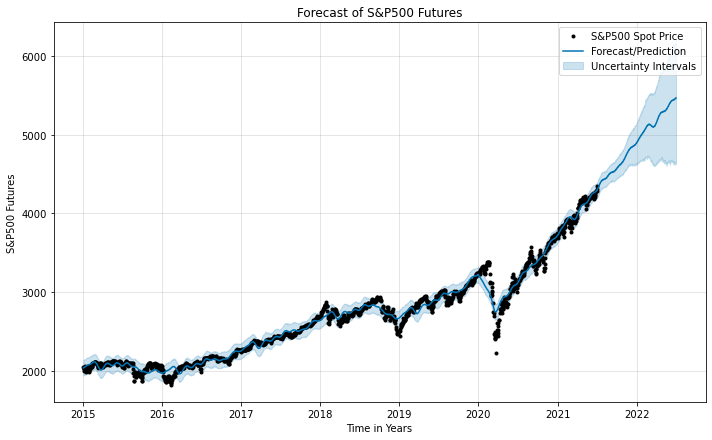

In [26]:
ig1 = m.plot(forecast)
import matplotlib.pyplot as plt
plt.title('Forecast of S&P500 Futures')
plt.xlabel('Time in Years')
plt.ylabel('S&P500 Futures')
plt.legend(["S&P500 Spot Price","Forecast/Prediction","Uncertainty Intervals"],loc='upper right')
plt.savefig("Prophet.jpg")
plt.show()

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,2036.011722,1937.334982,2133.571417,2036.011722,2036.011722,0.145308,0.145308,0.145308,2.276659,2.276659,2.276659,-2.131352,-2.131352,-2.131352,0.0,0.0,0.0,2036.157030
1,2015-01-05,2037.125887,1946.917783,2137.035726,2037.125887,2037.125887,1.053143,1.053143,1.053143,-0.424381,-0.424381,-0.424381,1.477524,1.477524,1.477524,0.0,0.0,0.0,2038.179030
2,2015-01-06,2037.497276,1950.379132,2146.780253,2037.497276,2037.497276,4.730884,4.730884,4.730884,1.783972,1.783972,1.783972,2.946911,2.946911,2.946911,0.0,0.0,0.0,2042.228159
3,2015-01-07,2037.868664,1943.551083,2143.528181,2037.868664,2037.868664,5.373236,5.373236,5.373236,0.857528,0.857528,0.857528,4.515708,4.515708,4.515708,0.0,0.0,0.0,2043.241900
4,2015-01-08,2038.240053,1946.799994,2144.437832,2038.240053,2038.240053,7.224596,7.224596,7.224596,1.063138,1.063138,1.063138,6.161459,6.161459,6.161459,0.0,0.0,0.0,2045.464649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,2022-06-28,5472.304205,4631.651261,6140.183932,4645.454346,6158.585795,-13.756903,-13.756903,-13.756903,1.783972,1.783972,1.783972,-15.540876,-15.540876,-15.540876,0.0,0.0,0.0,5458.547302
1986,2022-06-29,5475.526403,4656.269026,6155.869546,4646.813846,6166.092559,-14.899477,-14.899477,-14.899477,0.857528,0.857528,0.857528,-15.757004,-15.757004,-15.757004,0.0,0.0,0.0,5460.626926
1987,2022-06-30,5478.748601,4635.055515,6169.465231,4646.762335,6173.599322,-14.538107,-14.538107,-14.538107,1.063138,1.063138,1.063138,-15.601245,-15.601245,-15.601245,0.0,0.0,0.0,5464.210494
1988,2022-07-01,5481.970798,4625.963057,6183.466712,4646.949546,6181.106086,-12.785866,-12.785866,-12.785866,2.276659,2.276659,2.276659,-15.062525,-15.062525,-15.062525,0.0,0.0,0.0,5469.184932


### Call Values for T = One Month

In [20]:
c[0]

array([5.63916952e-01, 5.76568824e-01, 6.02651278e-01, ...,
       2.48360048e+03, 2.48851432e+03, 2.48761750e+03])

### Call Values for T = 1 Year

In [21]:
c[1]

array([ 138.3090902 ,  138.85352633,  139.94746405, ..., 2259.45413264,
       2263.4524833 , 2262.72267251])

### Call Values for T = 2 Years

In [22]:
c[2]

array([ 238.12787475,  238.77960759,  240.0872249 , ..., 2089.20500641,
       2092.50412095, 2091.90193716])

In [23]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


### Put Values for T = One Month

In [26]:
p[0]

array([   16.7751103 ,    17.03165257,    17.55370145, ...,
       11206.34145309, 11243.37190327, 11236.60997294])

### Put Values for T = 1 Year

In [27]:
p[1]

array([ 517.50258131,  517.91318137,  518.73311426, ..., 4181.63660376,
       4192.33656258, 4190.38281268])

### Put Values for T = 2 Years

In [28]:
p[2]

array([ 722.18417916,  722.5822805 ,  723.38013148, ..., 3426.1019015 ,
       3433.22759682, 3431.92653023])